In [0]:
# Move the file from Workspace to DBFS
dbutils.fs.cp("file:/Workspace/Users/azuser2126_mml.local@techademy.com/data.csv", "dbfs:/FileStore/data.csv")
 

True

In [0]:
# Load the file from DBFS
df = spark.read.format("csv").option("header", "true").load("/FileStore/data.csv")
df.show()

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
|2023-09-04|     UA|   ORD| ATL|       15|       20|
|2023-09-04|     DL|   LAX| SFO|       -5|      -10|
|2023-09-05|     AA|   LAX| JFK|       20|       25|
|2023-09-05|     UA|   DFW| ATL|        0|        0|
|2023-09-05|     DL|   JFK| LAX|       10|       15|
+----------+-------+------+----+---------+----

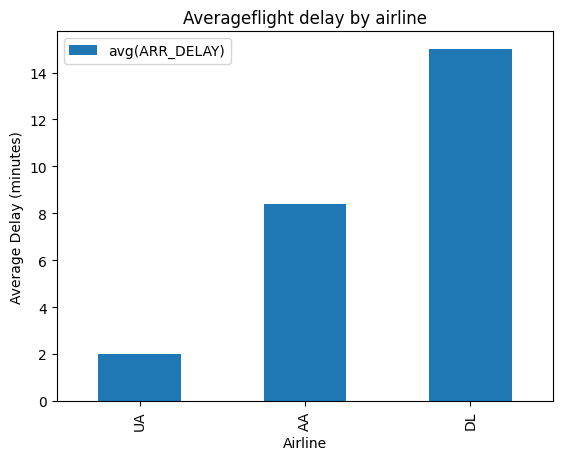

In [0]:
import matplotlib.pyplot as plt

#convert to pandas
df_pandas=df.groupBy("CARRIER").agg({"ARR_DELAY": "avg"}).toPandas()

#plot using Matplotlib
df_pandas.plot(kind="bar",x="CARRIER",y="avg(ARR_DELAY)",legend=True)
plt.title("Averageflight delay by airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()